# NLP Experiment 1: Word Embeddings
Experimenting With NLP using NLTK and Word Embeddings

## Load Required Libraries
Load libraries expected for this experiment:

- [ ] nltk 
- [ ] nltk.word_tokenize 
- [ ] spacy.lang.en.English 
- [ ] gensim 
- [ ] numpy 

In [1]:
# Local only 
!pip install --upgrade nltk
!pip install --upgrade spacy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import nltk
from nltk import word_tokenize 
from spacy.lang.en import English 


/home/ahmed/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-12-01 10:23:07.924871: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-01 10:23:07.924890: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-01 10:23:09.508888: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-01 10:23:09.508916: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-01 10:

In [3]:
!pip install --upgrade gensim

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import gensim.downloader as api 
import numpy as np 

Download word2vec, this may take some time 

In [5]:
wv = api.load('word2vec-google-news-300')

## Define Sample Text
define a couple of sample text strings and run some analysis

In [6]:
simple_str = "This is a simple string, used to test tokenization. It may have minimal information in it, but used to illustrate how to extract word embeddings"
strings_vector = [
    "Patiance is a virtue",
    "The sum of one and two is ",
    "better safe than sorry",
    "you cannot divide a number by zero",
    "are we there yet?"
]

## Sentence Concept 
Define a class of functions to extract the gist of a sentence using an aggregate of word embeddings

In [7]:
nlp = English()
tokenizer = nlp.tokenizer
def normalized_sum(sentence):
  """
  Calculates normalized sum of word embeddings of tokens in a sentence
  """

  toks = tokenizer(sentence)
  sum = []
  for token in toks:
    try: 
      v = wv[token.text]
      if len(sum) == 0:
        sum = v
      else:
        sum = sum + v 
    except:
      continue
  # normalize 
  sum = sum / np.linalg.norm(sum)
  return sum

## Calculate Normalized Sum 
Calculate normalized sum for sample sentences 

In [8]:
simple_str_ns = normalized_sum(simple_str)


### Evaluate Simple String Embedding
find closest words matching this concept

In [9]:
wv.most_similar(simple_str_ns)

[('By_Laurelle_Gilbert', 0.6034723520278931),
 ('%_#F########_9v.jsn', 0.5943512916564941),
 ('BY_ANDY_THOMPSON', 0.589264988899231),
 ('By_Jonas_Elmerraji', 0.585291862487793),
 ('it', 0.585139811038971),
 ('A.It_s', 0.5839791297912598),
 ('that', 0.5821940898895264),
 ('AThere', 0.5760250687599182),
 ('but', 0.5712571740150452),
 ('GREG_POTTER_Yes', 0.5703470706939697)]

### Try for other sentences


In [10]:
for s in strings_vector:
  print(s)
  print(wv.most_similar(normalized_sum(s)))

Patiance is a virtue
[('virtue', 0.836878776550293), ('is', 0.6671273112297058), ('means', 0.578962504863739), ('presupposes', 0.5349286794662476), ('dint', 0.5220244526863098), ('becomes', 0.4905795454978943), ("isn'ta", 0.48826590180397034), ('seems', 0.48623791337013245), ('dictates', 0.481949120759964), ('virture', 0.47703272104263306)]
The sum of one and two is 
[('one', 0.673549473285675), ('sum', 0.628027081489563), ('two', 0.5564963817596436), ('three', 0.5492445230484009), ('the', 0.5443174242973328), ('four', 0.539329469203949), ('five', 0.532472550868988), ('is', 0.5301937460899353), ('The', 0.5249226689338684), ('six', 0.5138891935348511)]
better safe than sorry
[('better', 0.7288674712181091), ('sorry', 0.6563988924026489), ('safe', 0.6418575048446655), ('safer', 0.6321291327476501), ('sorry_Semaitis', 0.618122935295105), ('happier', 0.5762538313865662), ('nicer', 0.5709905624389648), ('TV6_wonders', 0.5573280453681946), ('sorrier', 0.5523179173469543), ('Johnnie_Baston_di

## Dot Product
find the dot product of all word embeddings in a sentence

In [11]:
def cosine_similarity(sentence):
    """
    Define a function to calculate the 
    resulting cosine similarity between
    all word embeddings in a sentence
    """
    toks = tokenizer(sentence)
    sim = None
    for token in toks:
        try:
            v = wv[token.text]
            if sim == None:
                sim = v 
                print('first', sim)
            else:
                sim = np.linalg.multi_dot(sim, v)
                print(sim)
        except:
            continue
    return sim / np.linalg.norm(sim)
  

### Test Cosine Similarity

In [12]:
print(simple_str)
simple_str_cs = cosine_similarity(simple_str)
print(simple_str_cs)
wv.most_similar(simple_str_cs)

This is a simple string, used to test tokenization. It may have minimal information in it, but used to illustrate how to extract word embeddings
first [-0.2890625   0.19921875  0.16015625  0.02526855 -0.23632812  0.10205078
  0.06640625 -0.16503906  0.12597656  0.22070312  0.05517578 -0.28710938
 -0.02148438  0.05541992  0.01574707  0.29296875  0.19433594 -0.01531982
  0.03955078 -0.21484375  0.00994873  0.16015625  0.07958984 -0.05932617
  0.12353516 -0.27148438 -0.10205078  0.078125   -0.07519531  0.22363281
  0.16210938 -0.04614258  0.12304688  0.07275391  0.25        0.0072937
 -0.38867188  0.10644531  0.20996094  0.06103516  0.10107422  0.16894531
 -0.15429688 -0.08251953  0.06542969 -0.12255859 -0.11621094  0.04248047
  0.08251953  0.09716797 -0.05371094  0.125       0.15039062 -0.09228516
  0.23925781  0.15234375  0.1796875  -0.26171875  0.15429688  0.09619141
 -0.30859375 -0.05224609 -0.18652344 -0.24414062 -0.0612793  -0.12695312
  0.14160156 -0.03295898  0.03759766 -0.0986328

[('This', 1.0),
 ('It', 0.8164012432098389),
 ('That', 0.8073375225067139),
 ('The', 0.7025192379951477),
 ("It'sa", 0.6968192458152771),
 ('â_€_œThis', 0.6586222648620605),
 ("That'sa", 0.6455750465393066),
 ('Perhaps', 0.6198620796203613),
 ('More_importantly', 0.6120434999465942),
 ('Secondly', 0.6081434488296509)]

## Moving Average

In [13]:
def moving_avg(sentence):
    """
    Define a function to calculate the
    moving average of word embeddings
    for tokens in a sentence
    """
    toks = tokenizer(sentence)
    avg = None
    old = 0.7
    new = 0.3
    for token in toks:
        if token.is_stop:
            continue
        try:
            v = wv[token.text]
            if avg == None:
                avg = v
            else:
                avg = old * avg + v * new 
        except:
            continue
    return avg / np.linalg.norm(avg)

### Test Moving Average

In [14]:
simple_str_ma = moving_avg(simple_str)
print(simple_str_ma)
print(simple_str)
wv.most_similar(simple_str_ma)

[ 0.12323125 -0.03021913 -0.02109452  0.01383408 -0.09968388  0.02286058
  0.14991827  0.04415132 -0.00642647  0.04081545  0.01040009 -0.00042618
 -0.01726807  0.07574405 -0.02070207  0.04630983  0.14128424 -0.03944185
 -0.0474872  -0.01501145  0.00431702  0.107533   -0.00603401  0.00716233
 -0.00328682 -0.02668702 -0.00726044  0.01103783 -0.01628693 -0.01147934
 -0.06514774  0.05926089  0.07378177 -0.00721138 -0.06318545  0.03787202
  0.02148698  0.00505287  0.02668702  0.00130001  0.04905703  0.04650606
  0.0886951  -0.02727571  0.03983431 -0.04317018 -0.06475528  0.0788837
  0.01716996 -0.05533633 -0.0600458  -0.01025292  0.02904176 -0.08084598
 -0.01648316  0.05141176 -0.04493624 -0.107533   -0.02668702  0.00416985
 -0.00603401  0.01442277  0.01383408  0.00667176  0.04905703 -0.01599259
 -0.11852178  0.02570588  0.0474872   0.00745667  0.10203861 -0.01864167
  0.0488608  -0.02943422 -0.11145756 -0.02727571  0.0565137   0.0726044
  0.05533633  0.10203861 -0.05729861 -0.01824921 -0.0

[('simple', 1.0),
 ('straightforward', 0.7460168600082397),
 ('Simple', 0.7108174562454224),
 ('uncomplicated', 0.6297484636306763),
 ('simplest', 0.6171397566795349),
 ('easy', 0.5990299582481384),
 ('fairly_straightforward', 0.5893306732177734),
 ('deceptively_simple', 0.5743065476417542),
 ('simpler', 0.5537199974060059),
 ('simplistic', 0.5516539216041565)]

### Test Moving Average on other data

In [15]:
for s in strings_vector:
  print(s)
  print(wv.most_similar(moving_avg(s)))

Patiance is a virtue
[('virtue', 1.0), ('dint', 0.6641983985900879), ('virture', 0.5358221530914307), ('Uncommon_valor', 0.5161334276199341), ('Imam_Mohammed_Sadiq', 0.512965202331543), ('disinterestedness', 0.5091259479522705), ('Father_Skehan', 0.49249526858329773), ('exalted', 0.4778507947921753), ('Selflessness', 0.4691542088985443), ('exemplification', 0.45130637288093567)]
The sum of one and two is 
[('sum', 1.0000001192092896), ('sums', 0.743831992149353), ('amount', 0.6335751414299011), ('amounts', 0.5367383360862732), ('amout', 0.5301712155342102), ('outlay', 0.5228390693664551), ('GH_¢_###,###,###.##', 0.5000982880592346), ('N5million', 0.4885185956954956), ('Sums', 0.4867772161960602), ('paltry_sum', 0.47490522265434265)]
better safe than sorry
[('better', 1.0), ('stronger', 0.6623841524124146), ('quicker', 0.6499592065811157), ('smarter', 0.6418017148971558), ('worse', 0.6248995065689087), ('good', 0.6120728850364685), ('happier', 0.594508707523346), ('nicer', 0.59081923961

TypeError: unsupported operand type(s) for *: 'NoneType' and 'NoneType'

## Use Internal WV Model


In [16]:
def wv_prod(string):
    """Use Existing WV method"""
    main_toks = [ t for t in tokenizer(string) ]
    toks = []
    for t in main_toks:
        try:
            v = wv[t.text]
            if not t.is_stop:
                toks.append(t.text)
        except:
            continue
    return wv.most_similar_cosmul(positive=toks, negative=[])

### Test for simple sentence

In [17]:
simple_str_wv = wv_prod(simple_str)
print(simple_str_wv)
print(simple_str)
wv.most_similar(simple_str_wv)

[('Base##_encoding', 0.014345054514706135), ('fuzzing_tools', 0.01340305246412754), ('preemptive_ThreatSeeker_TM', 0.013388464227318764), ('alphabetic_characters', 0.01333235390484333), ('lnk_files', 0.01331906858831644), ('charts_graphs_maps', 0.013317907229065895), ('nonstandardized', 0.013066706247627735), ('NIST_MINEX_compliant', 0.012996304780244827), ('algebraic_formula', 0.012968824245035648), ('Javascript_extensively', 0.012934676371514797)]
This is a simple string, used to test tokenization. It may have minimal information in it, but used to illustrate how to extract word embeddings


[('window.open', 0.745729923248291),
 ('TITLE_Debian_update', 0.7442658543586731),
 ('SOLUTION_Restrict_access', 0.7414754033088684),
 ('Display_Coleman_Liau', 0.7405574917793274),
 ('DIRECTORS_OF_CAPITAL_CORP.', 0.7392650842666626),
 ('inferential_statistics', 0.7367329597473145),
 ('xls_files', 0.727687656879425),
 ('MGRS_Military_grid', 0.7265646457672119),
 ('LINQ_queries', 0.7253888845443726),
 ('By_Miriam_Reimer', 0.7237569093704224)]

### Test for other sentences

In [18]:
for s in strings_vector:
  print(s)
  print(wv.most_similar(wv_prod(s)))

Patiance is a virtue
[('virtue', 0.7619860172271729), ('unmerited_favor', 0.6585700511932373), ('Honesty_integrity', 0.65229731798172), ('dutifulness', 0.650239884853363), ('gentleness_kindness', 0.6296283006668091), ('dauntless_courage', 0.6238256096839905), ('omnipotent_omniscient', 0.6219653487205505), ('Graciousness', 0.6212397813796997), ('whoever_humbles', 0.6209989786148071), ('moral_uprightness', 0.6154956817626953)]
The sum of one and two is 
[('sum', 0.8194766640663147), ('N4_###,###,###.##', 0.6124118566513062), ('N1_###,###,###', 0.5915540456771851), ('GH_¢_##,###,###.##', 0.5894641280174255), ('amountof', 0.5883204340934753), ('N##.###bn', 0.5862666964530945), ('N2_###,###.##', 0.5857111215591431), ('N4_###,###,###', 0.5802429914474487), ('N5billion', 0.5800169706344604), ('Sh##million', 0.5774497985839844)]
better safe than sorry
[('Said_Hirschbeck', 0.742898166179657), ('safe_Arlene_Deche', 0.7359633445739746), ('nurse_practitioner_Nunez', 0.7296922206878662), ('numb_Gwe

ValueError: cannot compute similarity with no input

In [19]:
# for fun experiment, test code snippets 

test_1 = """
int method(List<string> list) 
{
    int count = 0;
    for (int i = 0; i < list.size(); i++) {
        if (list.get(i).equals("test")) {
            count++;
        }
    }
    return count;
}
"""
test_1_ns = normalized_sum(test_1)
test_1_ma = moving_avg(test_1)
test_1_wv = wv_prod(test_1)

print(test_1)
print('normalized sum')
print(wv.most_similar(test_1_ns))
print('moving average')
print(wv.most_similar(test_1_ma))
print('word2vec')
print(wv.most_similar(test_1_wv))


int method(List<string> list) 
{
    int count = 0;
    for (int i = 0; i < list.size(); i++) {
        if (list.get(i).equals("test")) {
            count++;
        }
    }
    return count;
}

normalized sum
[('int', 0.7454499006271362), ('=_strlen', 0.668779194355011), ('=', 0.6647939682006836), ('=_argv', 0.6594706773757935), ('Automatic_Fuel_Injected_SILVE', 0.6416589021682739), ('len_=', 0.6287344694137573), ('strlen', 0.6204768419265747), ('==_NULL', 0.6156640648841858), ('=_null_&&', 0.6144644021987915), ('#_endif', 0.614333987236023)]
moving average
[('int', 1.0000001192092896), ('Bearing_Liabilities_incl.', 0.5867320895195007), ('ent', 0.5760172605514526), ('main_int_argc', 0.5722032785415649), ('ot', 0.569582462310791), ('te', 0.5633426904678345), ('nt', 0.5594090819358826), ('tr', 0.5539928674697876), ('ar', 0.5524088740348816), ('......', 0.549221932888031)]
word2vec
[('0_document.write', 0.8930276036262512), ('=_sizeof', 0.8857088685035706), ('0_document.write_sline', 0

In [32]:
wv.most_similar_cosmul(positive=['Joe_Biden', 'Japan'],negative=['USA'])

[('Prime_Minister_Yukio_Hatoyama', 1.0011963844299316),
 ('Prime_Minister_Taro_Aso', 0.9990742802619934),
 ('Prime_Minister_Naoto_Kan', 0.9837645888328552),
 ('Prime_Minister_Junichiro_Koizumi', 0.9818952083587646),
 ('Shinzo_Abe', 0.9746299982070923),
 ('Taku_Yamasaki', 0.9643604755401611),
 ('Yukio_Edano', 0.9625372886657715),
 ('Nobutaka_Machimura', 0.9612914323806763),
 ('Taro_Aso', 0.9561181664466858),
 ('Shigeru_Ishiba', 0.9532682299613953)]

In [38]:
wv['dog']

array([ 5.12695312e-02, -2.23388672e-02, -1.72851562e-01,  1.61132812e-01,
       -8.44726562e-02,  5.73730469e-02,  5.85937500e-02, -8.25195312e-02,
       -1.53808594e-02, -6.34765625e-02,  1.79687500e-01, -4.23828125e-01,
       -2.25830078e-02, -1.66015625e-01, -2.51464844e-02,  1.07421875e-01,
       -1.99218750e-01,  1.59179688e-01, -1.87500000e-01, -1.20117188e-01,
        1.55273438e-01, -9.91210938e-02,  1.42578125e-01, -1.64062500e-01,
       -8.93554688e-02,  2.00195312e-01, -1.49414062e-01,  3.20312500e-01,
        3.28125000e-01,  2.44140625e-02, -9.71679688e-02, -8.20312500e-02,
       -3.63769531e-02, -8.59375000e-02, -9.86328125e-02,  7.78198242e-03,
       -1.34277344e-02,  5.27343750e-02,  1.48437500e-01,  3.33984375e-01,
        1.66015625e-02, -2.12890625e-01, -1.50756836e-02,  5.24902344e-02,
       -1.07421875e-01, -8.88671875e-02,  2.49023438e-01, -7.03125000e-02,
       -1.59912109e-02,  7.56835938e-02, -7.03125000e-02,  1.19140625e-01,
        2.29492188e-01,  

In [39]:
s_legal = [
    """17.1 Fair market share for Company A will be based on city pairs in North America for direct routes managed by Delta Airlines.""",
    """17.2 Company A will utilize Delta at a fair market share of 60 percent for flights originating in NYC and terminating in SFO.""",
    """17.3 A person who is not a party to this Agreement has no right to enforce any of its terms under the Contracts (Rights of Third
     Parties) Act 1999.""",
    """17.4 Provisions of the Agreement which by their nature should apply beyond their terms, will remain in force after any termination
     or expiration of these Terms and Conditions including, but not limited to, the following provisions: Confidential Information,
     Governing Law and Submission to Jurisdiction.""",
    """17.5 The Customer shall not assign any of its rights or delegate any of its obligations under the Agreement without the prior written
     consent of ATPI. Any purported assignment or delegation in violation of this Clause is null and void. No assignment or delegation
     relieves the Customer of any of its obligations under the Agreement.""",
    """17.6 These Terms and Conditions are solely for the benefit of the Customer and ATPI. It is not for the benefit of any other person,
     except for permitted successors and assigns.""",
    """17.7 The Agreement comprises the entire agreement between the Parties, and supersedes all prior or contemporaneous
     understandings, agreements, negotiations, representations and warranties, and communications, both written and oral in
     relation to the subject matter of the Agreement.""",
]

In [40]:
# sum of word vectors
def sent2vec(s):
    words = str(s).lower()
    words = tokenizer(words)
    M = []
    for w in words:
        try:
            M.append(wv[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    return v / np.sqrt((v ** 2).sum())

In [42]:
#  calculate the cosine similarity
def cos_sim(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [44]:
legal_vec = [sent2vec(s) for s in s_legal]

/tmp/ipykernel_96392/2056317550.py:13: RuntimeWarning: invalid value encountered in double_scalars
  return v / np.sqrt((v ** 2).sum())


In [52]:
legal_similarity_matrix = np.zeros((7, 7))
for i in range(7):
    for j in range(7):
        str1 = normalized_sum(s_legal[i])
        str2 = normalized_sum(s_legal[j])

        legal_similarity_matrix[i, j] = 1 - np.linalg.norm(str1 - str2)

In [49]:
# import pyplot
import matplotlib.pyplot as plt


In [54]:
legal_similarity_matrix

array([[ 1.        ,  0.42036647,  0.05415332,  0.05719644,  0.07875156,
         0.14665604, -0.02347291],
       [ 0.42036647,  1.        ,  0.04698986,  0.09012043,  0.12237865,
         0.11325663,  0.01900166],
       [ 0.05415332,  0.04698986,  1.        ,  0.37701154,  0.43116897,
         0.25413394,  0.28274572],
       [ 0.05719644,  0.09012043,  0.37701154,  1.        ,  0.38750178,
         0.35486293,  0.28810358],
       [ 0.07875156,  0.12237865,  0.43116897,  0.38750178,  1.        ,
         0.32113504,  0.348086  ],
       [ 0.14665604,  0.11325663,  0.25413394,  0.35486293,  0.32113504,
         1.        ,  0.14315563],
       [-0.02347291,  0.01900166,  0.28274572,  0.28810358,  0.348086  ,
         0.14315563,  1.        ]])

In [ ]:
ui_tokens = tokenizer("I want a bar chart with air data by traveller")
wv.most_similar_cosmul(positive=[ui_tokens], negative=[])

: 

: 

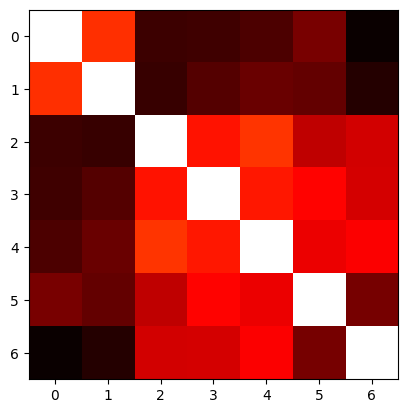

In [53]:
plt.imshow(legal_similarity_matrix, cmap='hot', interpolation='nearest')